# Notebook to:
- Visualize graphs
- See the Q table

In [1]:
# library imports
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
# local imports
from environment import TreasureCube
from agents.RandomAgent import RandomAgent
from agents.QLearningAgent import QLearningAgent

In [2]:
def showPlot(X, Y, xlabel, ylabel):
    plt.plot(X, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [3]:
def test_cube(max_episode, max_step):
    env = TreasureCube(max_step=max_step)
    agent = QLearningAgent()
    episode_rewards = []
    for epsisode_num in tqdm(range(0, max_episode)):
        state = env.reset()
        terminate = False
        t = 0
        episode_reward = 0
        while not terminate:
            action = agent.take_action(state)
            # print(action)
            reward, terminate, next_state = env.step(action)
            episode_reward += reward
            t += 1
            agent.train(state, action, next_state, reward)
            state = next_state
        # print(
        #     f'episode: {epsisode_num}, total_steps: {t} episode reward: {episode_reward}')
        episode_rewards.append(episode_reward)
    # plot =  showPlot(list(range(max_episode)), episode_rewards,
    #                 'episode', 'episode rewards')
    qTable = agent.getQTable()
    return episode_rewards, qTable


In [4]:
max_episode = 1000
max_step = 500
episode_rewards, qTable = test_cube(max_episode, max_step)

100%|██████████| 1000/1000 [00:01<00:00, 811.08it/s]


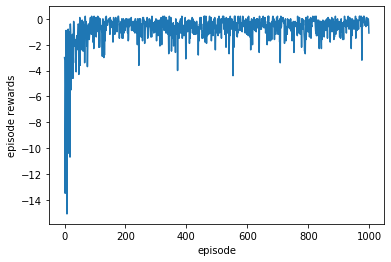

In [5]:
showPlot(range(max_episode), episode_rewards, xlabel='episode', ylabel= 'episode rewards')

In [6]:
qTable

,000,001,002,003,010,011,012,013,020,021,...,312,313,320,321,322,323,330,331,332,333
right,-0.617105,-0.564610,-0.484346,-0.459664,-0.510095,-0.517595,-0.397060,-0.020503,-0.528911,-0.417634,...,0.448670,0.463451,-0.246340,-0.186236,-0.066646,0.940938,-0.226219,-0.054377,-0.050000,0
left,-0.631651,-0.565080,-0.495481,-0.472455,-0.547653,-0.489895,-0.428625,-0.426436,-0.526932,-0.426731,...,-0.170790,-0.050000,-0.277489,-0.236515,-0.064397,0.000000,-0.197056,-0.097500,-0.050000,0
forward,-0.456364,-0.564278,-0.337804,-0.463266,-0.553490,-0.518203,-0.403371,-0.410487,-0.513383,-0.304990,...,-0.180095,-0.050000,-0.267141,-0.204251,-0.097500,0.000000,-0.226219,-0.097500,-0.050000,0
backward,-0.617410,-0.577089,-0.494135,-0.461083,-0.547517,-0.506371,-0.424353,-0.405514,-0.521607,-0.441952,...,-0.194046,-0.050000,-0.266784,-0.173159,-0.110000,0.000000,-0.189768,-0.060793,-0.050000,0
up,-0.627505,-0.476615,-0.489106,-0.469468,-0.551968,-0.378706,-0.242072,-0.405623,-0.481922,-0.434640,...,-0.160830,-0.072500,-0.047609,0.400734,0.736046,0.000000,0.301315,0.638337,0.966128,0
down,-0.632724,-0.569890,-0.517316,-0.490601,-0.563586,-0.507354,-0.414213,-0.399930,-0.525159,-0.431197,...,-0.194518,-0.050000,-0.264908,-0.194086,-0.050000,0.000000,-0.185494,-0.050000,0.000000,0
